In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [84]:
uploaded = files.upload()

Saving housing.csv to housing (1).csv


In [254]:
#load the dataset
df = pd.read_csv('housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

In [184]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [185]:
df.info()#To check on the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [256]:
df.dropna(inplace=True)#drop missing values

In [255]:
df.columns #The Columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [258]:
#Check on duplicated rows
df.duplicated().sum()

np.int64(0)

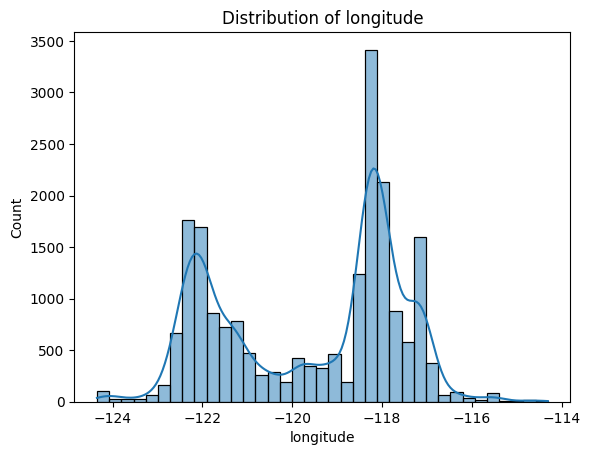

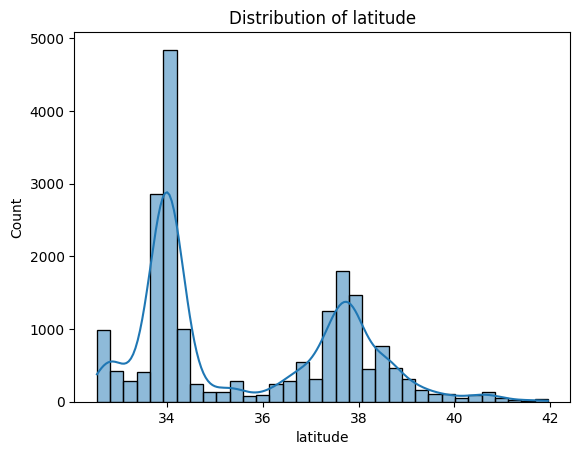

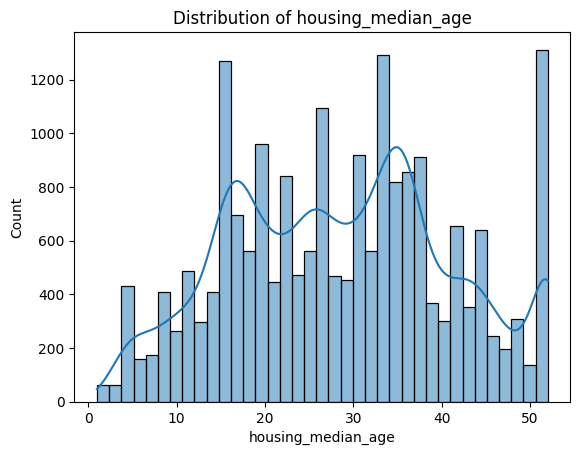

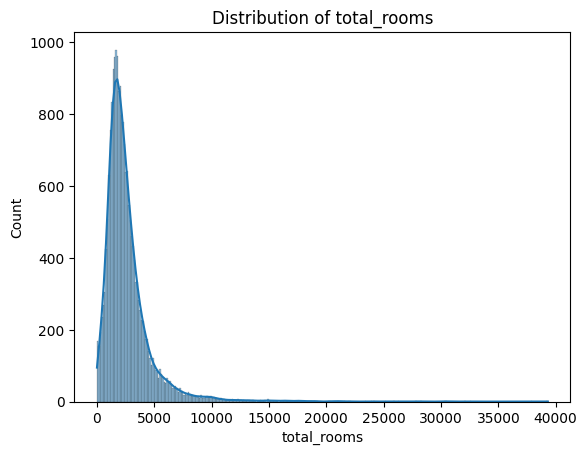

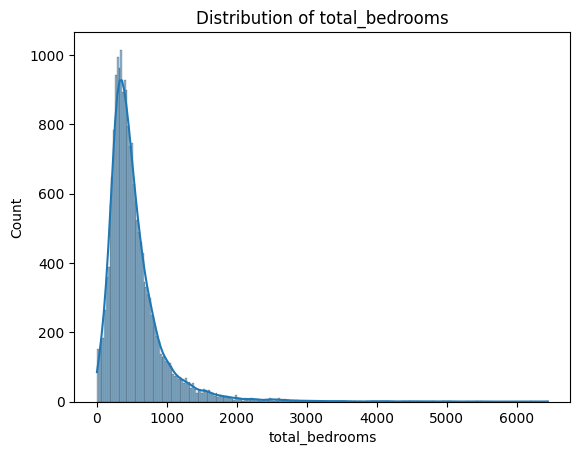

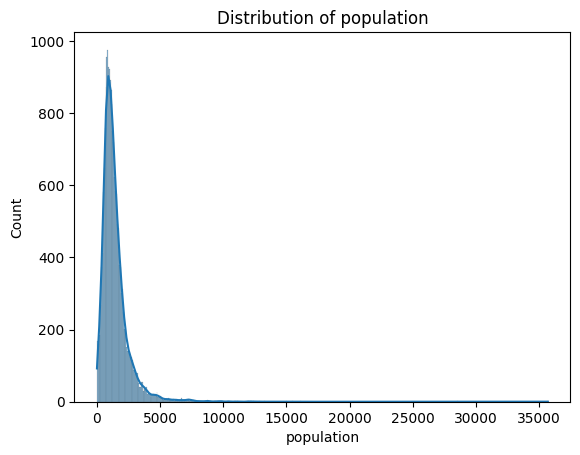

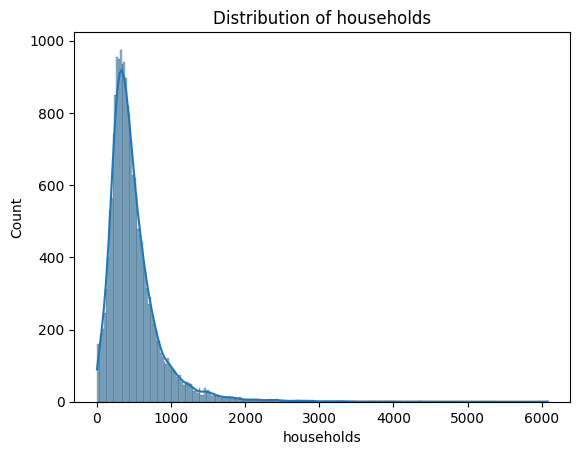

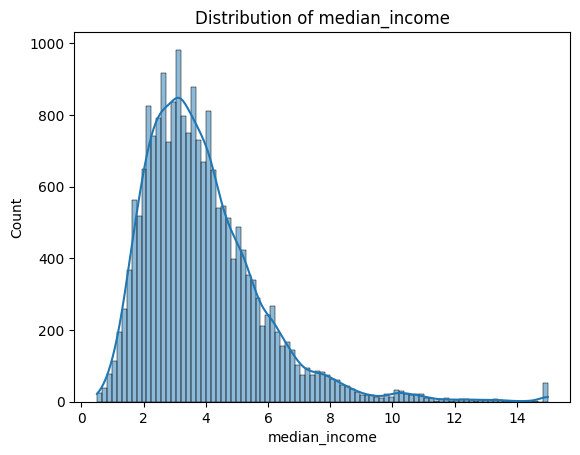

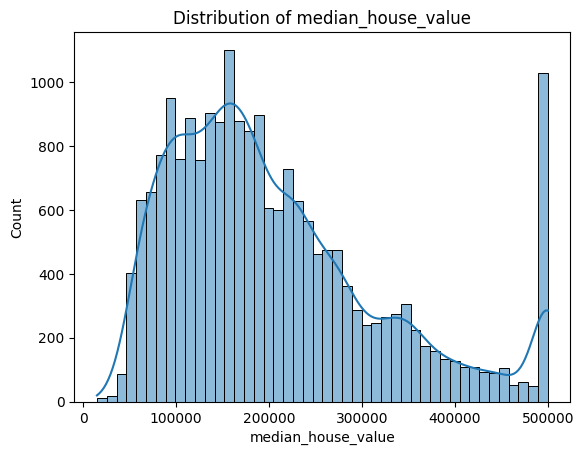

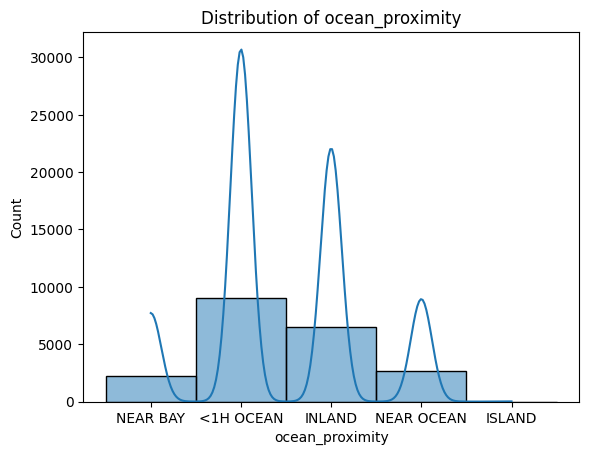

In [261]:
#Distribution of columns
for col in df:
    plt.Figure(figsize=(8,6))
    sns.histplot(df[col] ,kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

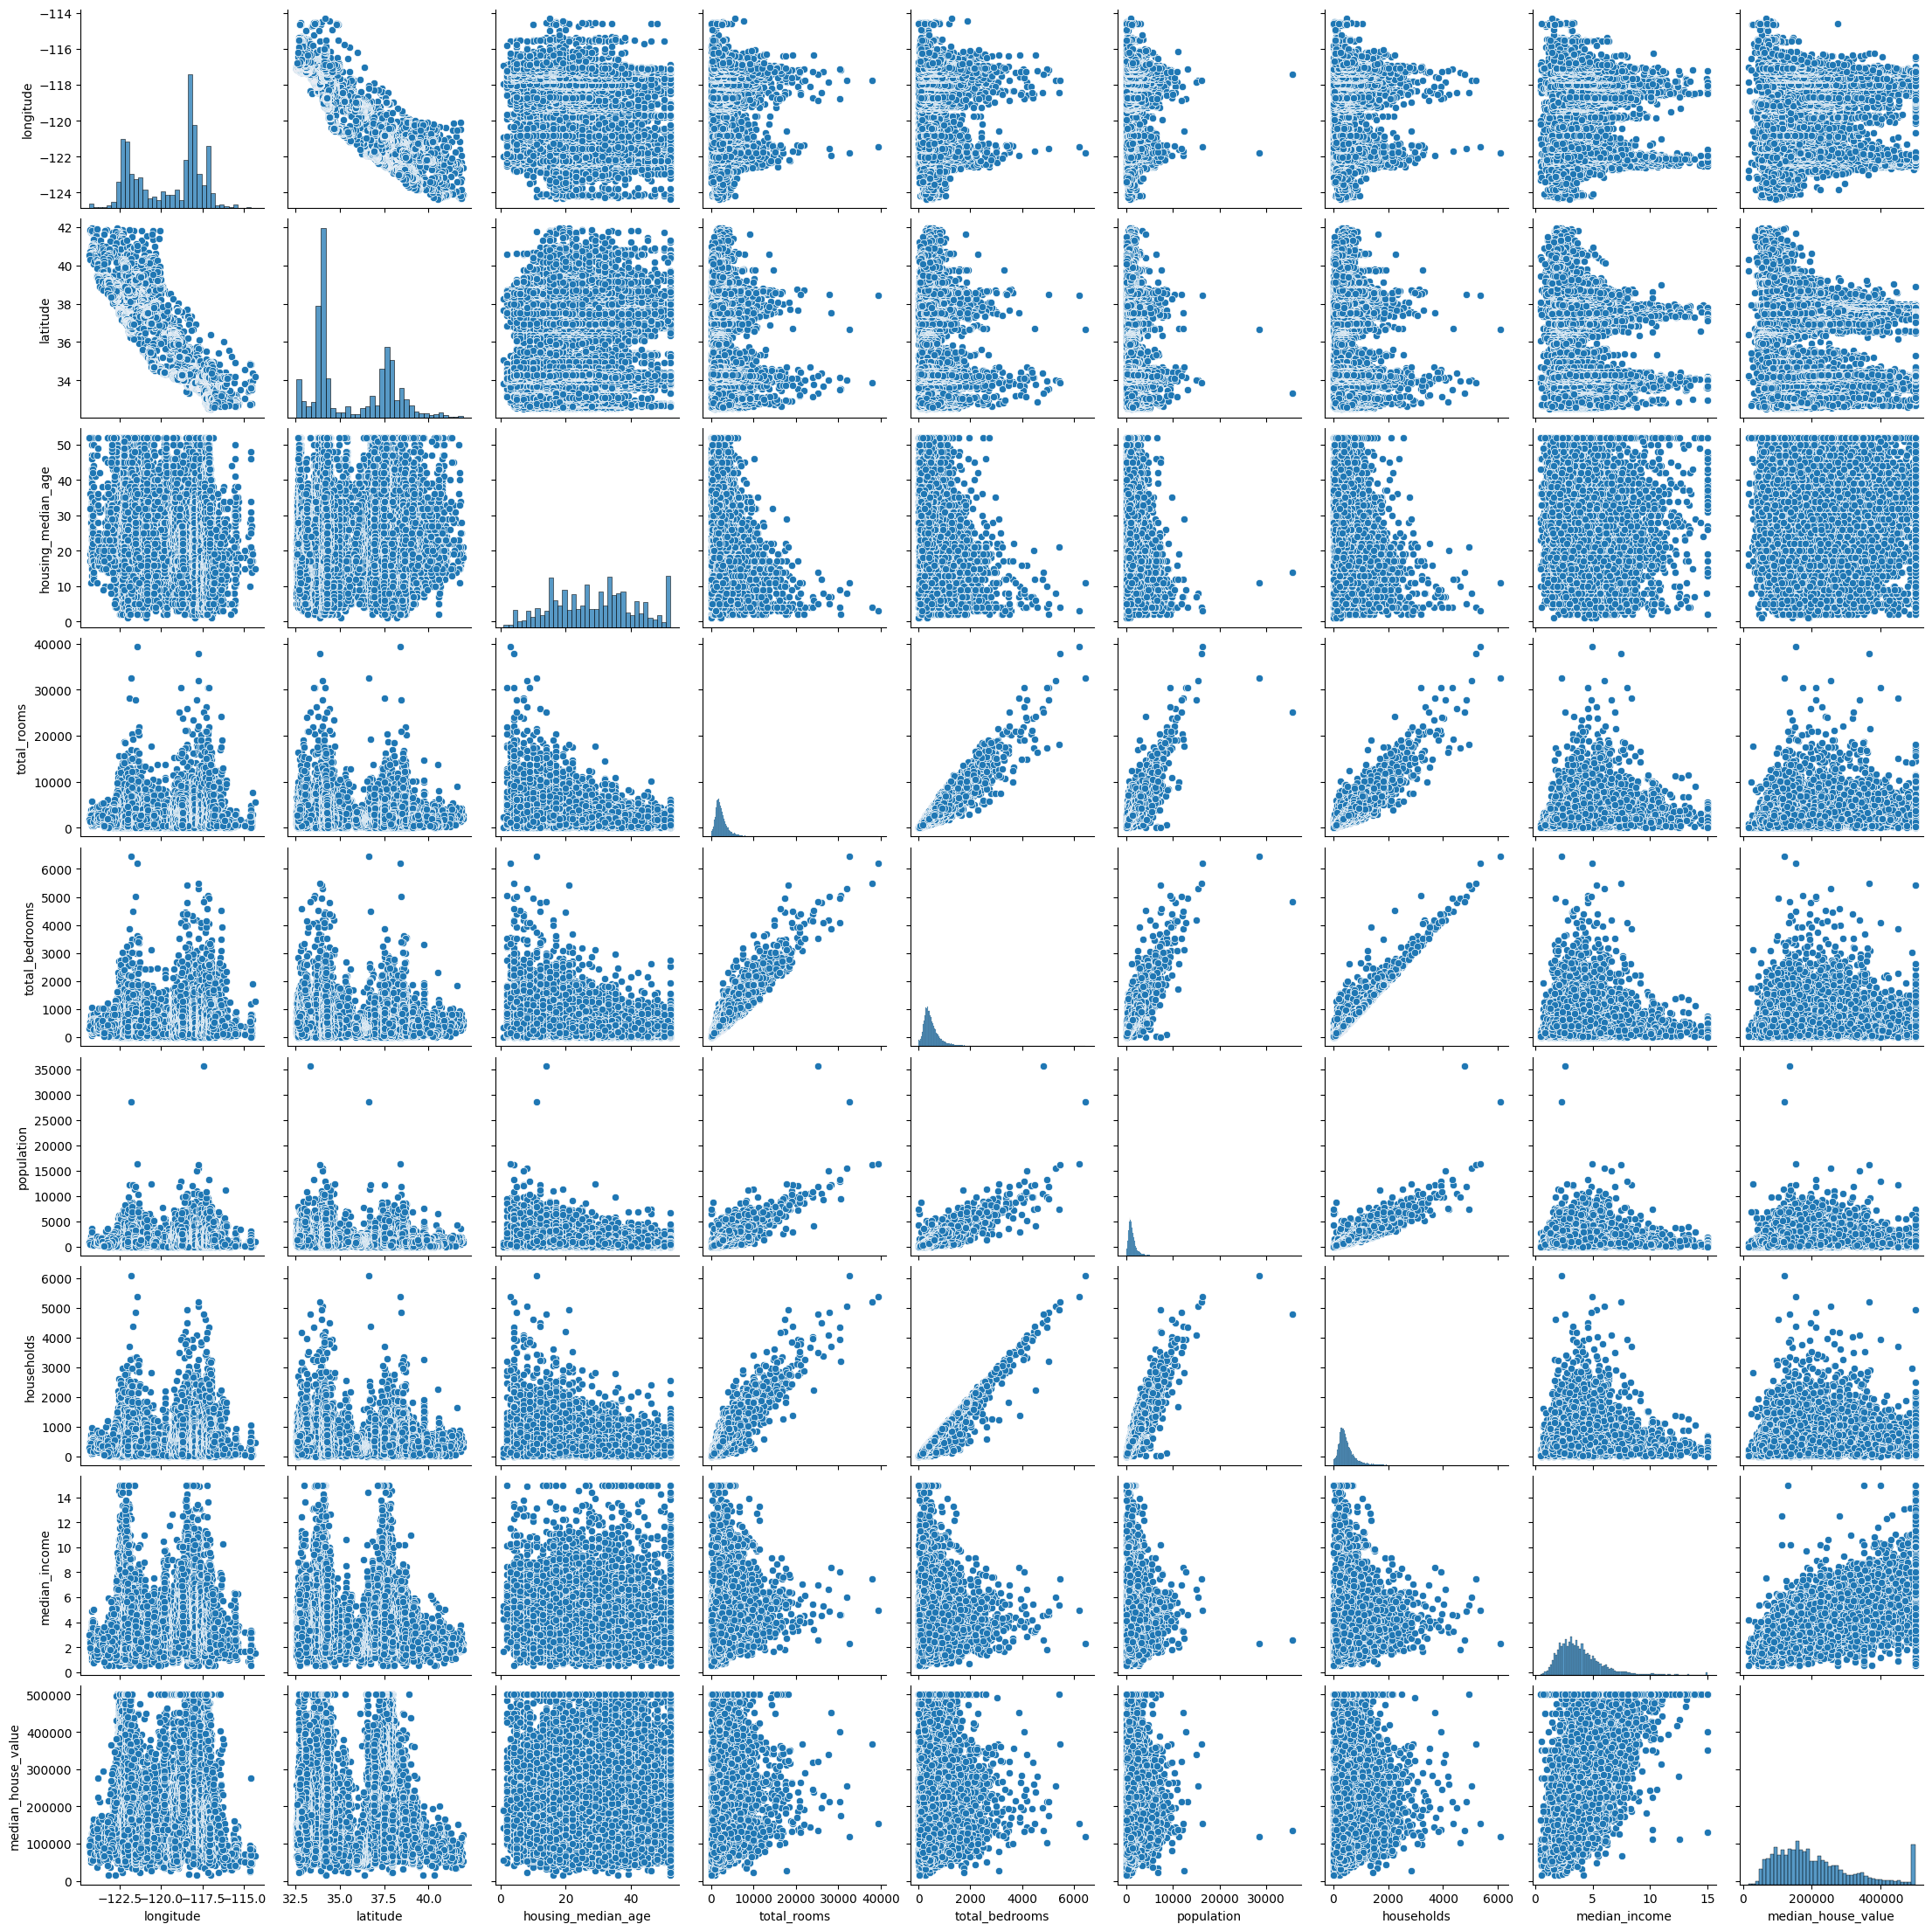

In [262]:
sns.pairplot(df)
plt.show()

In [265]:
#Encoding the categorical columns (convert to numerical)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [266]:
df['ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

In [267]:
from sklearn.model_selection import train_test_split

x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [268]:
x

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity  
0           322.0       126.0         8.3252                3  
1          2401.0      1138.0         8.3014                3  
2           496.0       177.0         7.2574                3  
3           558.0       219.0         5.6431                3  
4           565.0       259.0         3.8462                3  
...           ...         ...            ...              ...  
20635       845.0       330.0         1.5603                1  
20636       356.0       114.0         2.5568                1  
20637      1007.0       433.0         1.7000                1  
20638       741.0       349.0         1.8672                1  
20639      1387.0       530.0         2.3886                1  

[20433 rows x 9 columns]

In [269]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [270]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state= 42)

In [271]:
train_data = x_train.join(y_train)
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0       4412.0           924.0   
2057     -119.63     36.64                33.0       1036.0           181.0   
6453     -118.06     34.12                25.0       3891.0           848.0   
4619     -118.31     34.07                28.0       2362.0           949.0   
15266    -117.27     33.04                27.0       1839.0           392.0   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0       2991.0           500.0   
12081    -117.54     33.76                 5.0       5846.0          1035.0   
5447     -118.42     34.01                42.0       1594.0           369.0   
866      -122.04     37.57                12.0       5719.0          1064.0   
15948    -122.43     37.73                52.0       3602.0           738.0   

       population  households  median_income  ocean_proximity  \
17727      2698.0       891.0         4.7027                0   
2057        620.0       174.0         3.4107                1   
6453       1848.0       759.0         3.6639                1   
4619       2759.0       894.0         2.2364                0   
15266      1302.0       404.0         3.5500                4   
...           ...         ...            ...              ...   
11397      1437.0       453.0         5.4286                0   
12081      3258.0      1001.0         4.7965                0   
5447        952.0       362.0         3.0990                0   
866        3436.0      1057.0         5.2879                3   
15948      2270.0       647.0         3.8934                3   

       median_house_value  
17727            227600.0  
2057             110400.0  
6453             248100.0  
4619             305600.0  
15266            214600.0  
...                   ...  
11397            273400.0  
12081            160800.0  
5447             335400.0  
866              231200.0  
15948            251800.0  

[16346 rows x 10 columns]

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

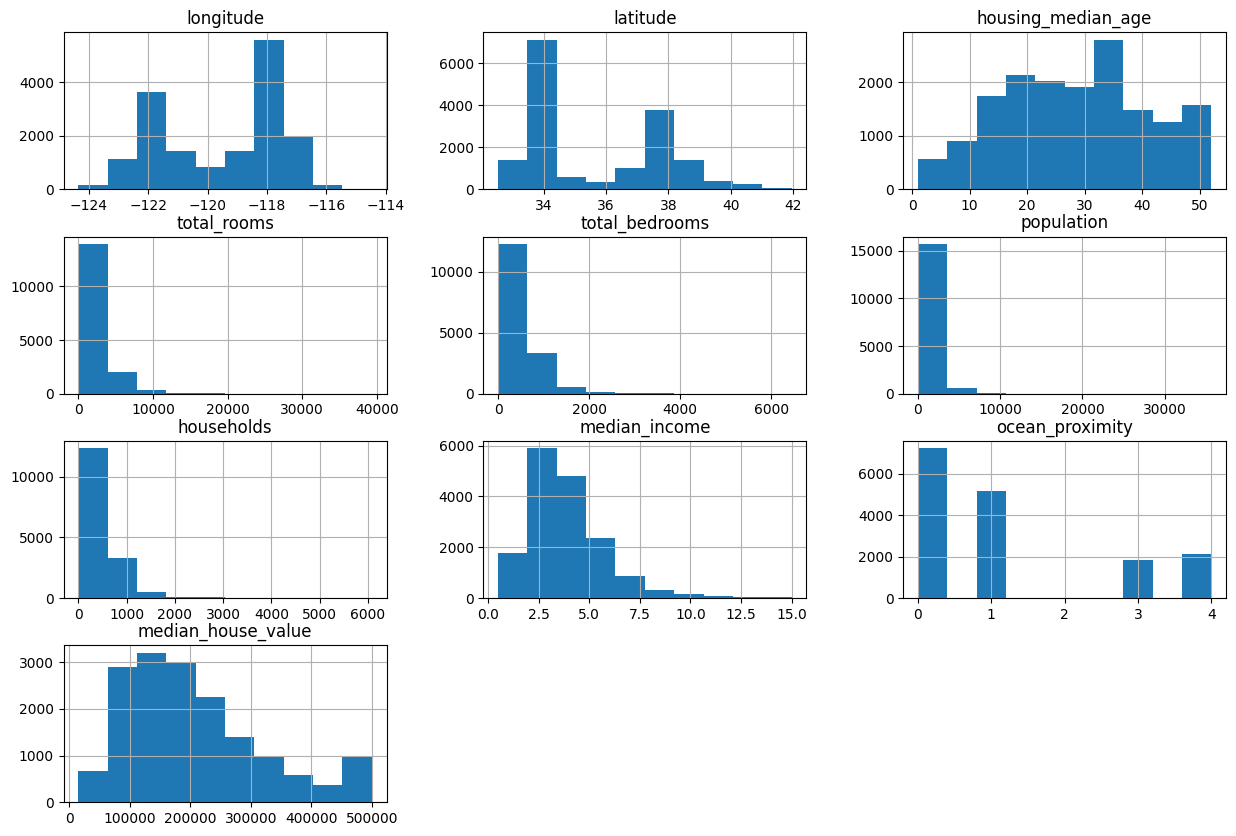

In [272]:
train_data.hist(figsize=(15,10))

<Axes: >

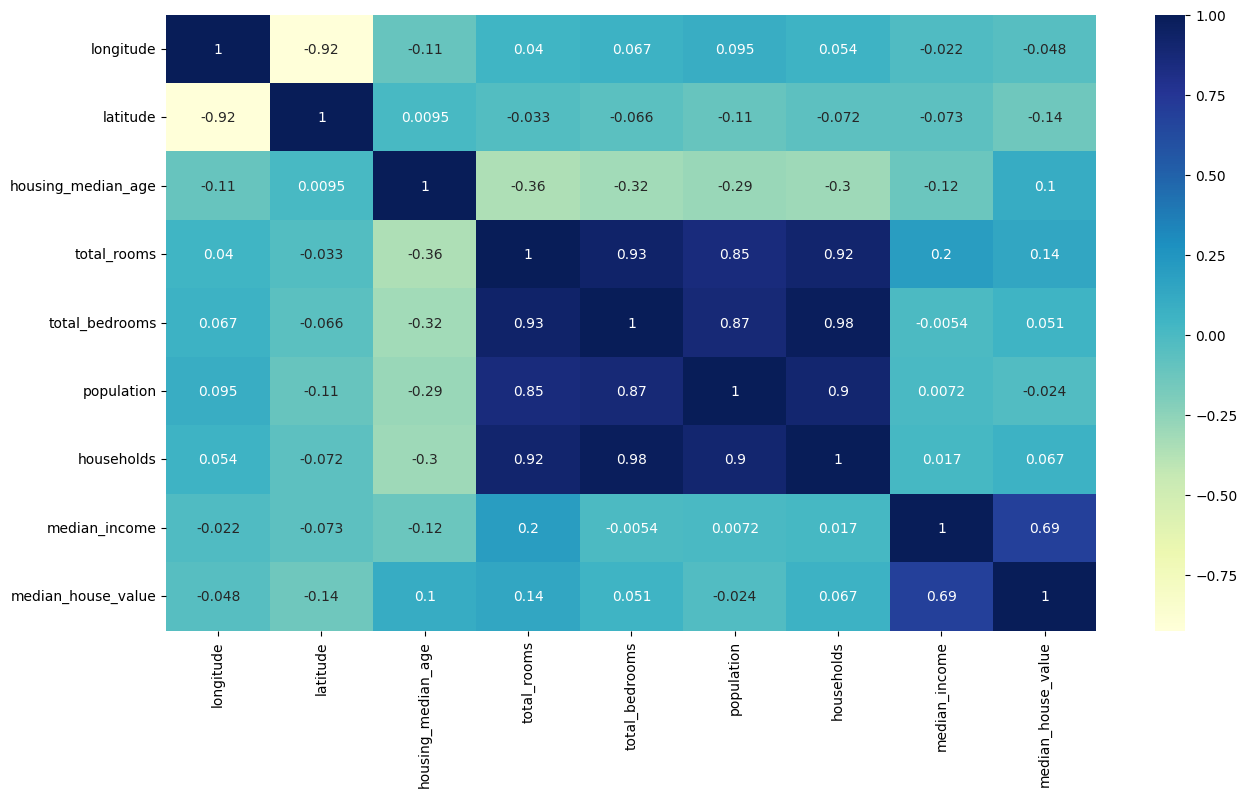

In [273]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu')

In [274]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

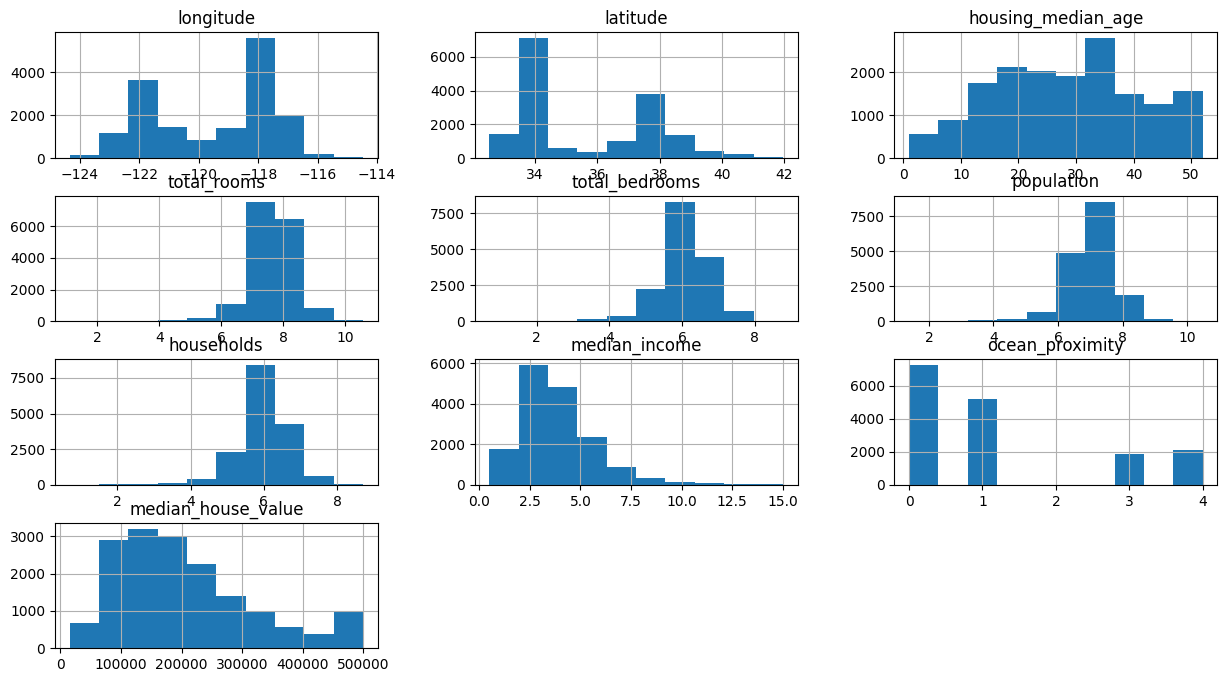

In [275]:
train_data.hist(figsize=(15,8))

In [276]:
# Apply one-hot encoding to 'ocean_proximity' and drop the original column
train_data

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17727    -121.80     37.32                14.0     8.392310        6.829794   
2057     -119.63     36.64                33.0     6.944087        5.204007   
6453     -118.06     34.12                25.0     8.266678        6.744059   
4619     -118.31     34.07                28.0     7.767687        6.856462   
15266    -117.27     33.04                27.0     7.517521        5.973810   
...          ...       ...                 ...          ...             ...   
11397    -117.97     33.72                24.0     8.003697        6.216606   
12081    -117.54     33.76                 5.0     8.673684        6.943122   
5447     -118.42     34.01                42.0     7.374629        5.913503   
866      -122.04     37.57                12.0     8.651724        6.970730   
15948    -122.43     37.73                52.0     8.189522        6.605298   

       population  households  median_income  ocean_proximity  \
17727    7.900637    6.793466         4.7027                0   
2057     6.431331    5.164786         3.4107                1   
6453     7.522400    6.633318         3.6639                1   
4619     7.922986    6.796824         2.2364                0   
15266    7.172425    6.003887         3.5500                4   
...           ...         ...            ...              ...   
11397    7.271009    6.118097         5.4286                0   
12081    8.089176    6.909753         4.7965                0   
5447     6.859615    5.894403         3.0990                0   
866      8.142354    6.964136         5.2879                3   
15948    7.727976    6.473891         3.8934                3   

       median_house_value  
17727            227600.0  
2057             110400.0  
6453             248100.0  
4619             305600.0  
15266            214600.0  
...                   ...  
11397            273400.0  
12081            160800.0  
5447             335400.0  
866              231200.0  
15948            251800.0  

[16346 rows x 10 columns]

<Axes: >

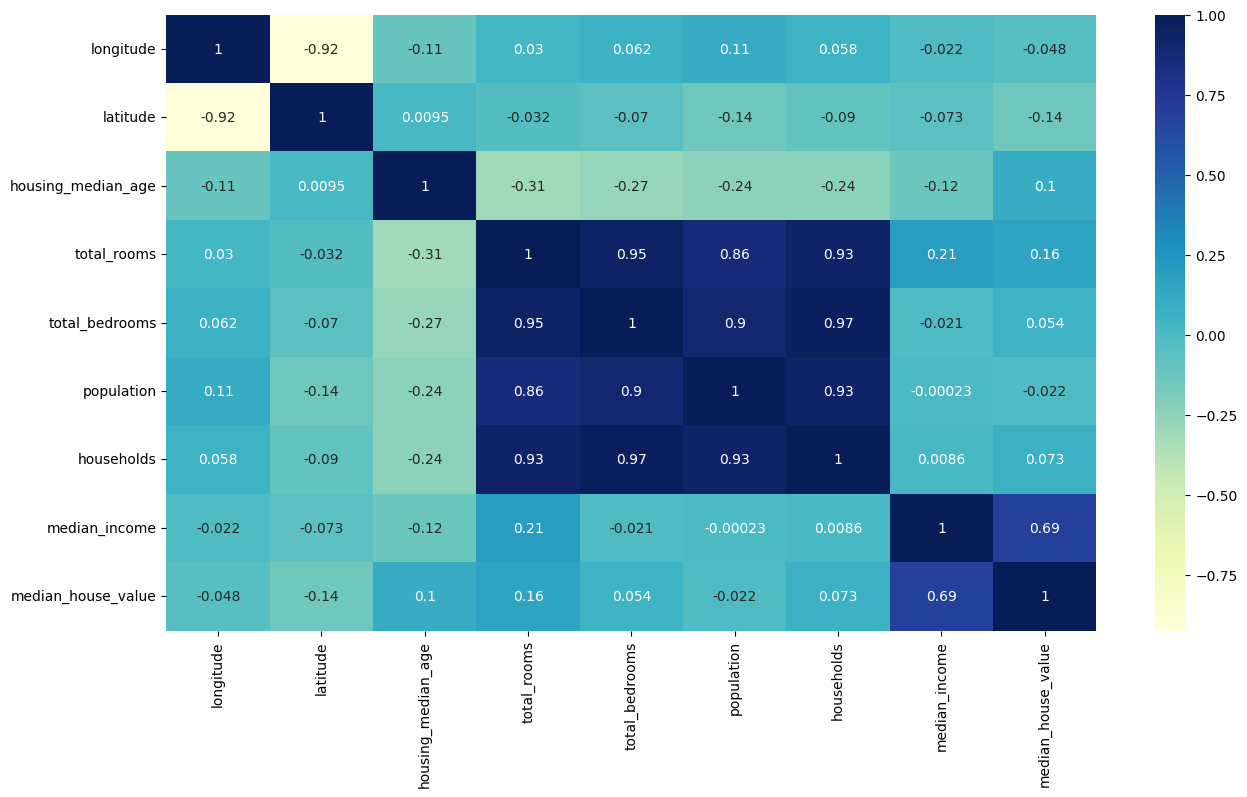

In [277]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='longitude', ylabel='latitude'>

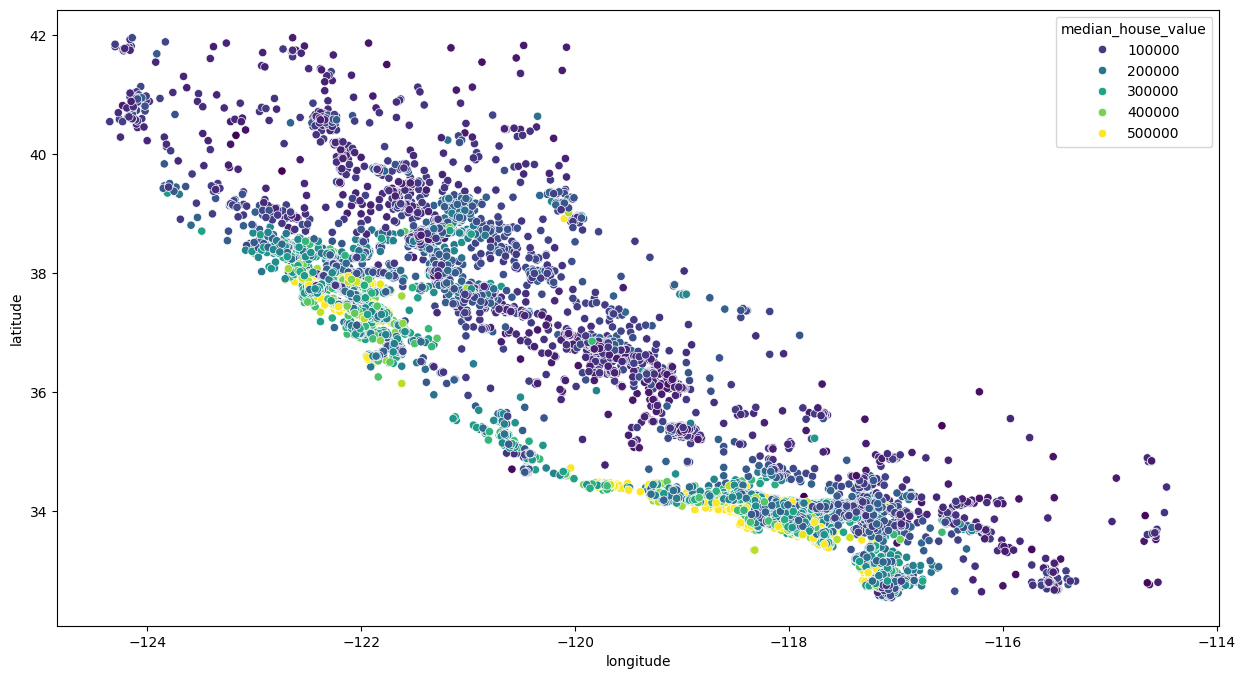

In [278]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=train_data, palette='viridis')

In [279]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

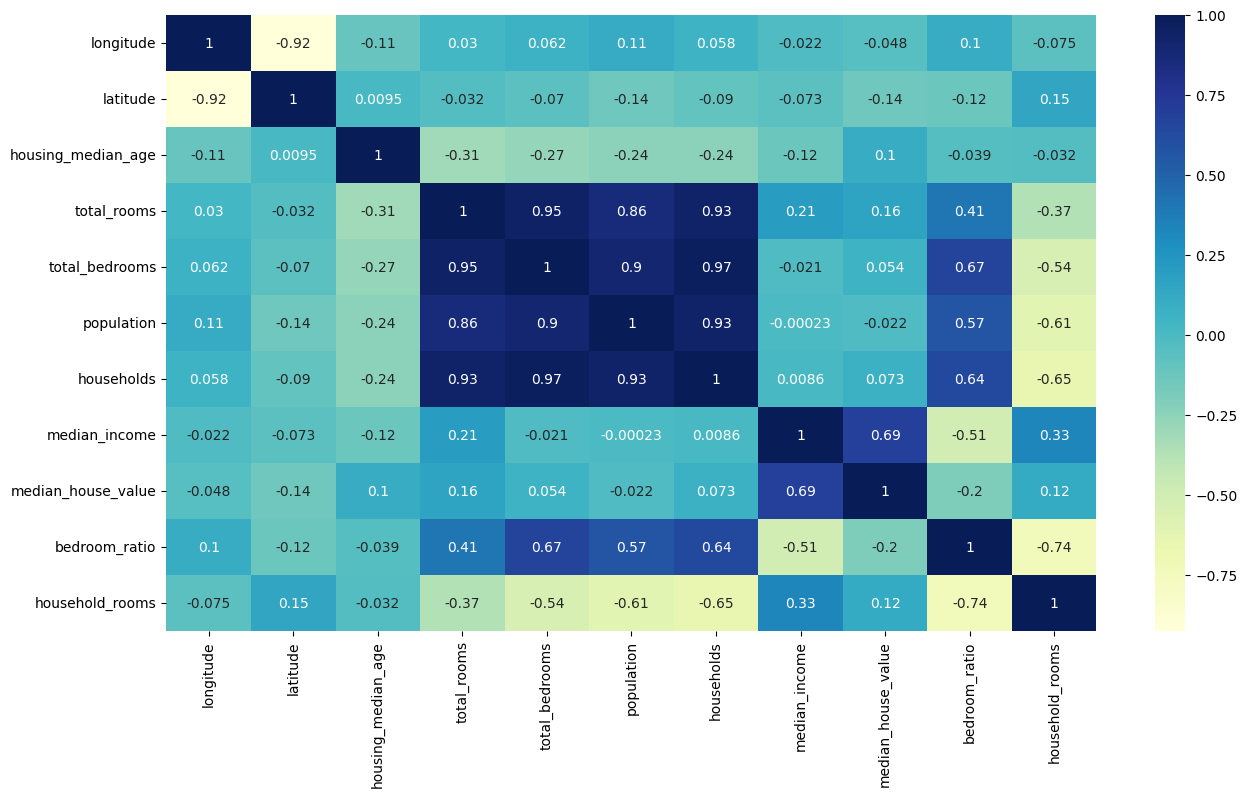

In [280]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='YlGnBu')

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , r2_score

In [282]:
models = {
    'Linear_Regression Model' : LinearRegression(),

    'Random_Forest Model' : RandomForestRegressor()
}

In [283]:
train_score = []
test_score = []
def impute_model(model) :
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    print('Train Metrics:')
    print('mean_absolute_error:', mean_absolute_error(y_train ,train_pred))
    print('r2_score:', r2_score(y_train, train_pred))
    train_score.append(r2_score(y_train, train_pred))
    print('')

    print('Test Metrics:')
    print('mean_absolute_error:', mean_absolute_error(y_test, test_pred))
    print('r2_score:', r2_score(y_test, test_pred))
    test_score.append(r2_score(y_test, test_pred))

In [284]:
model = []
for model_name , model_algo in models.items():
    print(f'**{model_name}**')
    model.append(model_name)
    impute_model(model_algo)
    print('')

**Linear_Regression Model**
Train Metrics:
mean_absolute_error: 50630.49743658007
r2_score: 0.636039119275638

Test Metrics:
mean_absolute_error: 51388.700189508156
r2_score: 0.6399236679243365

**Random_Forest Model**
Train Metrics:
mean_absolute_error: 11767.680545699253
r2_score: 0.9745357028058881

Test Metrics:
mean_absolute_error: 32110.80216784928
r2_score: 0.820587633091858



In [285]:
scores = pd.DataFrame({
    'model' : model ,
    'train_score' : train_score ,
    'test_score' : test_score
})

scores

model  train_score  test_score
0  Linear_Regression Model     0.636039    0.639924
1      Random_Forest Model     0.974536    0.820588

In [291]:
rf_model = models['Random_Forest Model']
rf_model.fit(x_train, y_train)
predictions = rf_model.predict(x_test)
print(predictions[:10])

[240105.03 153058.   193300.   147588.   159221.    76712.   289582.
 202836.   463367.5   69698.  ]


In [290]:
lr_model = models['Linear_Regression Model']
lr_model.fit(x_train, y_train)
predictions = lr_model.predict(x_test)
print(predictions[:10])

[195854.43379088 157564.34984099 202476.8302992  173038.26811323
 214022.31040524 108153.48729167 285498.59311587 249462.77455267
 390860.39141922  49344.17632515]


In [292]:
y_test.head()

14416    245800.0
16383    137900.0
7731     218200.0
1410     220800.0
1335     170500.0
Name: median_house_value, dtype: float64

In [293]:
x_test.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14416    -117.24     32.79                20.0        961.0           278.0   
16383    -121.29     38.01                 2.0       6403.0          1116.0   
7731     -118.14     33.92                31.0       3731.0           853.0   
1410     -122.07     37.94                30.0       1260.0           276.0   
1335     -121.89     37.99                 4.0       2171.0           597.0   

       population  households  median_income  ocean_proximity  
14416       525.0       254.0         3.1838                4  
16383      3327.0       957.0         4.4871                1  
7731       2313.0       801.0         3.2237                0  
1410        707.0       221.0         2.8920                3  
1335        928.0       461.0         4.1016                1